In [39]:
import pandas as pd

# CARGAMOS EL DATASET DE ENTRENAMIENTO
df_train = pd.read_csv(r"./Insumos/mitbih_train.csv")

df_train.columns = [f'Feature {i + 1}' for i in range(len(df_train.columns) - 1)] + ['Target']
df_train

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 179,Feature 180,Feature 181,Feature 182,Feature 183,Feature 184,Feature 185,Feature 186,Feature 187,Target
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [52]:
resultado = df_train[df_train['Target'] == 4].iloc[0,:-1]
resultado.to_csv('./Insumos/target4.csv', index=False)

In [2]:
# VALIDAMOS LOS VALORES FALTANTES
print(df_train.isnull().sum())

# CONTAMOS LOS VALORES DE CADA CLASE
print(df_train['Target'].value_counts())

Feature 1      0
Feature 2      0
Feature 3      0
Feature 4      0
Feature 5      0
              ..
Feature 184    0
Feature 185    0
Feature 186    0
Feature 187    0
Target         0
Length: 188, dtype: int64
Target
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [3]:
# from imblearn.over_sampling import SMOTE

# SEPARAMOS LOS DATOS PREDICTORES Y OBJETIVO
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

# # BALANCEAMOS LOS DATOS UTILIZANDO SMOTE
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X, y)

# df_result = pd.concat([y_resampled, X_resampled], axis=1)
# df_result.to_csv('./Insumos/electro.csv')

In [4]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

brf = BalancedRandomForestClassifier(random_state=42)

# REALIZAMOS LA BUSQUEDA DE HIPERPARAMETROS
param_grid = {
    'n_estimators': [100, 200, 500],        # NUMERO DE ARBOLES
    'max_depth': [10, 20, None],            # PROFUNDIDAD MAXIMA DE UN ARBOL
    'min_samples_split': [2, 10, 20],       # NUMERO MINIMO DE MUESTRAS PARA DIVIDIR UN NODO
    'min_samples_leaf': [1, 5, 10],         # NUMERO MINIMO DE MUESTRAS EN UN NODO
    'bootstrap': [True, False]              # BOOTSTRAP EN LA MUESTRA
}

grid_search = GridSearchCV(estimator=brf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# AJUSTAMOS NUESTRO MODELO
grid_search.fit(X, y)

# OBTENEMOS LAS PREDICCIONES
y_pred = grid_search.best_estimator_.predict(X)

# CALCULAMOS LA EXACTITUD 
accuracy = accuracy_score(y, y_pred)

print(f'Mejores hiperparámetros: {grid_search.best_params_}')
print(f'\nAccuracy: {accuracy:.5f}')
print(f'\n{classification_report(y, y_pred)}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Mejores hiperparámetros: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Accuracy: 0.90898

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94     72470
         1.0       0.46      0.98      0.62      2223
         2.0       0.81      0.95      0.87      5788
         3.0       0.16      1.00      0.28       641
         4.0       0.93      0.98      0.95      6431

    accuracy                           0.91     87553
   macro avg       0.67      0.96      0.73     87553
weighted avg       0.96      0.91      0.93     87553



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

plt.style.use('ggplot')

In [11]:
# CONSTRUIMOS EL MODELO CON LOS MEJORES HIPERPARAMETROS ENCONTRADOS
best_brf = BalancedRandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

# AJUSTAMOS NUESTRO MODELOL
best_brf.fit(X, y)

# OBTENEMOS LAS PREDICCIONES
y_pred = best_brf.predict(X)

# CALCULAMOS EL ACCURACY
accuracy = accuracy_score(y, y_pred)

print(f'Accuracy: {accuracy:.5f}')
print(f'\n{classification_report(y, y_pred)}')

c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.90898

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94     72470
         1.0       0.46      0.98      0.62      2223
         2.0       0.81      0.95      0.87      5788
         3.0       0.16      1.00      0.28       641
         4.0       0.93      0.98      0.95      6431

    accuracy                           0.91     87553
   macro avg       0.67      0.96      0.73     87553
weighted avg       0.96      0.91      0.93     87553



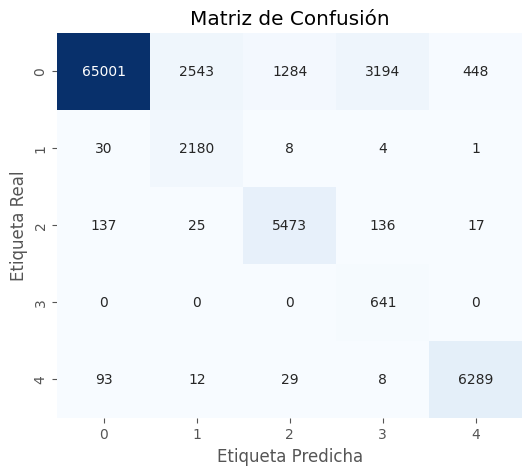

In [16]:
# VISUALIZAMOS LA MATRIZ DE CONFUSION
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión' )
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

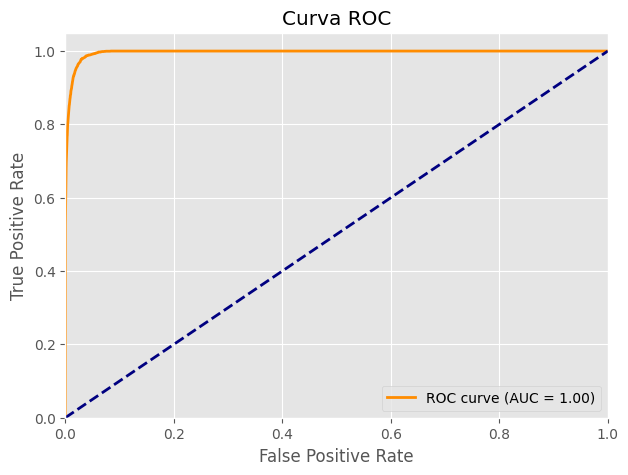

In [18]:
# OBTENEMOS LAS PROBABILIDADES PREDICHAS
y_pred_prob = best_brf.predict_proba(X)[:, 1]

# CALCULAMOS LA CURVA ROC
fpr, tpr, _ = roc_curve(y, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# VISUALIZAMOS LA CURVA ROC
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [21]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# CRUVA DE APRENDIZAJE
start_time = time.time()

# CONJUNTOS DE PRUEBA Y ENTRNAMIENTO
train_sizes, train_scores, test_scores = learning_curve(
    best_brf, X, y, cv=50, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

print('--- Elapsed time = %s seconds ---' % (time.time() - start_time))

# MEDIAS Y DESVIACIONES DE CADA PUNTAJE
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

--- Elapsed time = 3656.9441533088684 seconds ---


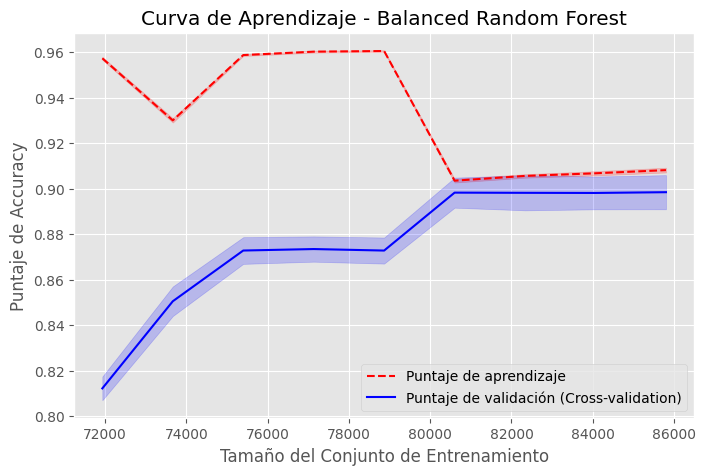

In [23]:
# GRAFICAMOS LA CURVA DE APRENDIZAJE
plt.figure(figsize=(8,5))

# LINEAS DE ENTRENAMIENTO Y VALIDACION
plt.plot(train_sizes, train_mean, '--', color='r', label="Puntaje de aprendizaje")
plt.plot(train_sizes, test_mean, color='b', label="Puntaje de validación (Cross-validation)")

# BANDAS DE DESVIACIÓN ESTÁNDAR
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="b", alpha=0.2)

plt.title("Curva de Aprendizaje - Balanced Random Forest")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje de Accuracy")
plt.legend(loc="best")
plt.grid(True)

plt.show()